In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Uderstanding the data

PassegderId : every unique passenger in ths titanic
<br>
survival:	0 = No, 1 = Yes
<br>
pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
<br>
Name : Name of passenger
<br>
sex : gender of passenger
<br>
Age: Age in years	age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
<br>
sibsp: # of siblings / spouses aboard the Titanic	
<br>
The dataset defines family relations in this way...
<br>
Sibling = brother, sister, stepbrother, stepsister
<br>
Spouse = husband, wife (mistresses and fiancés were ignored)
<br>
parch: # of parents / children aboard the Titanic	
<br>
The dataset defines family relations in this way...
<br>
Parent = mother, father
<br>
Child = daughter, son, stepdaughter, stepson
<br>
Some children travelled only with a nanny, therefore parch=0 for them.
<br>
ticket: Ticket number	
<br>
fare: Passenger fare	
<br>
cabin : Cabin number	
<br>
embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(df.Survived.value_counts())

print('ratio of survided passengers is quite low in comparison to deaths')

0    549
1    342
Name: Survived, dtype: int64
ratio of survided passengers is quite low in comparison to deaths


In [8]:
print(df.Pclass.value_counts())
print('As we can see the 3rd class pessengers are more in compared to first and second class')

3    491
1    216
2    184
Name: Pclass, dtype: int64
As we can see the 3rd class pessengers are more in compared to first and second class


In [9]:
pd.unique(df['Age'])

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

At first by looking at the age datatype (float) seems incorrect age should be descreet but after looking at the minimum value in the age it seems that the smallest member in the cruise is of 4 month infant. 
<br>
Also after looking at null values, there are considerable amount of null values in age and cabin column 

In [12]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
print(df.Embarked.value_counts())
print('As we can see most number of people are boarded from south hampton')

S    644
C    168
Q     77
Name: Embarked, dtype: int64
As we can see most number of people are boarded from south hampton


### Dealing with null values

Age column

In [16]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
df.Age.median()

28.0

In [18]:
df.Age.fillna(df.Age.median(), inplace=True)

In [19]:
df.Age.isna().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

## Aanalysis of Genders

In [21]:
gen = df.Sex.value_counts()

Ratio of Gender

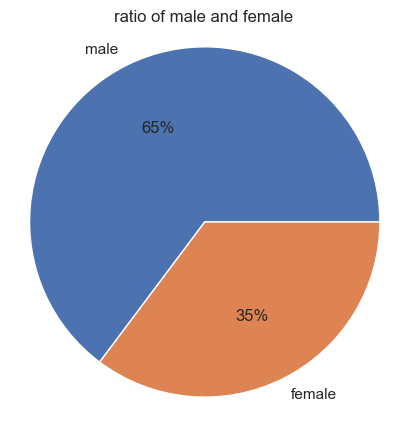

In [22]:
sns.set(style="darkgrid")

plt.figure(figsize=(5,5))
plt.pie(x = gen, labels= gen.index, autopct='%.0f%%')
plt.axis('equal')
plt.title('ratio of male and female')


plt.show()


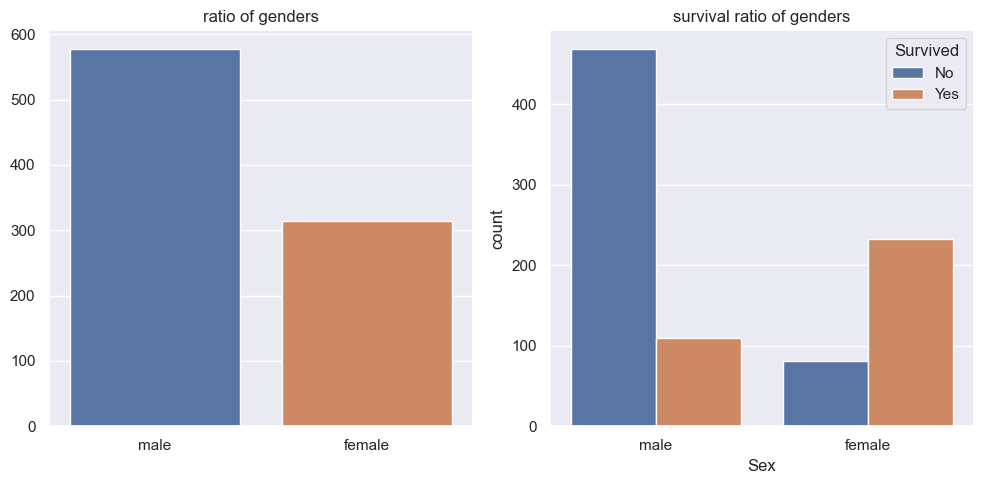

In [23]:
plt.figure(figsize=(10,5))

# 1st plot
ax = plt.subplot(1,2,1)
sex_counts = df['Sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('ratio of genders')

# 2nd plot
ax1 = plt.subplot(1,2,2)
sns.countplot(x=df.Sex, hue = df.Survived)
ax1.legend(title='Survived', labels=['No', 'Yes'])
plt.title('survival ratio of genders')

#plot
plt.tight_layout()
plt.show()

by looking at the graphs we can see the ratio of Male is much more that the females , but the survial rate of female is much higher than the male.

Ratio of survial 

In [24]:
sur = df.Survived.value_counts()

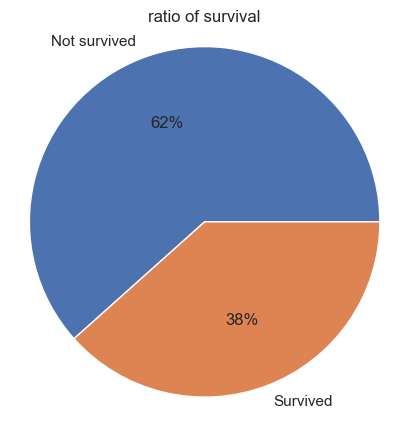

In [25]:
plt.figure(figsize=(5,5))
plt.pie(x = sur, labels= ['Not survived','Survived'], autopct='%.0f%%')
plt.axis('equal')
plt.title('ratio of survival')


plt.show()


Here we can see regardless of the gender the survial rate of passengers in titanic is about 38% only where in this percentage 70% are only females.

## P-Class

In [26]:
p_class = df.Pclass.value_counts()
p_class

3    491
1    216
2    184
Name: Pclass, dtype: int64

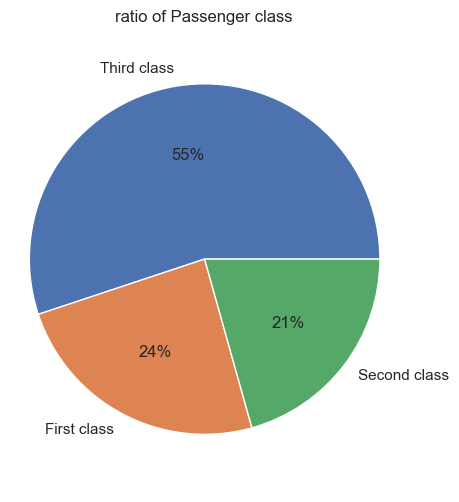

In [27]:
plt.figure(figsize=(5,6))
plt.pie(x = p_class, labels = ['Third class','First class','Second class'], autopct='%.0f%%')
plt.axis('equal')
plt.title('ratio of Passenger class')


plt.show()


In [28]:
pd.crosstab(index=df.Pclass, columns= df.Survived )

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


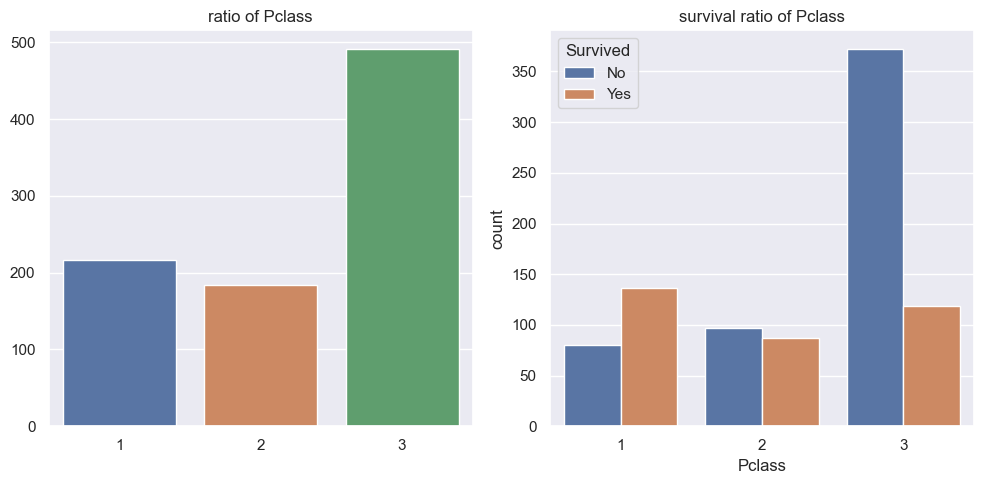

In [29]:
plt.figure(figsize=(10,5))

# 1st plot
ax = plt.subplot(1,2,1)
p_class_c = df['Pclass'].value_counts()
sns.barplot(x=p_class_c.index, y=p_class_c.values)
plt.title('ratio of Pclass')

# 2nd plot
ax1 = plt.subplot(1,2,2)
sns.countplot(x=df.Pclass, hue = df.Survived)
ax1.legend(title='Survived', labels=['No', 'Yes'])
plt.title('survival ratio of Pclass')

#plot
plt.tight_layout()
plt.show()

Here we can see the majority of the people were from 3rd class but the survial rate of the 1st class is more.

In [30]:
pd.crosstab(index=[df.Sex, df.Pclass], columns=df.Survived).style.background_gradient(cmap='tab20')

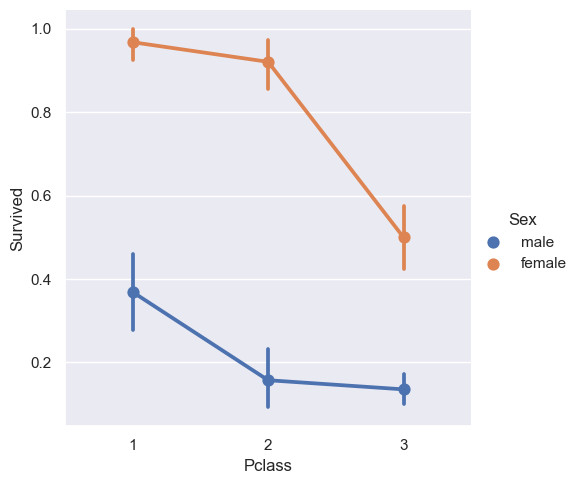

In [31]:

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')

plt.xlabel('Pclass')
plt.ylabel('Survived')

plt.show()


As we can see Almost 97 to 98% of 1st class woman survived 2x than the 3rd class woman survival rate. 

## Embarked

In [32]:
pd.crosstab(index=[df.Embarked,df.Pclass], columns= [df.Sex, df.Survived]).style.background_gradient(cmap='cividis')

In above cross tab we can see the highest sivival is of Females who were embarked from South Hampton

Text(0.5, 1.0, 'Emarked on the basis of Pclass')

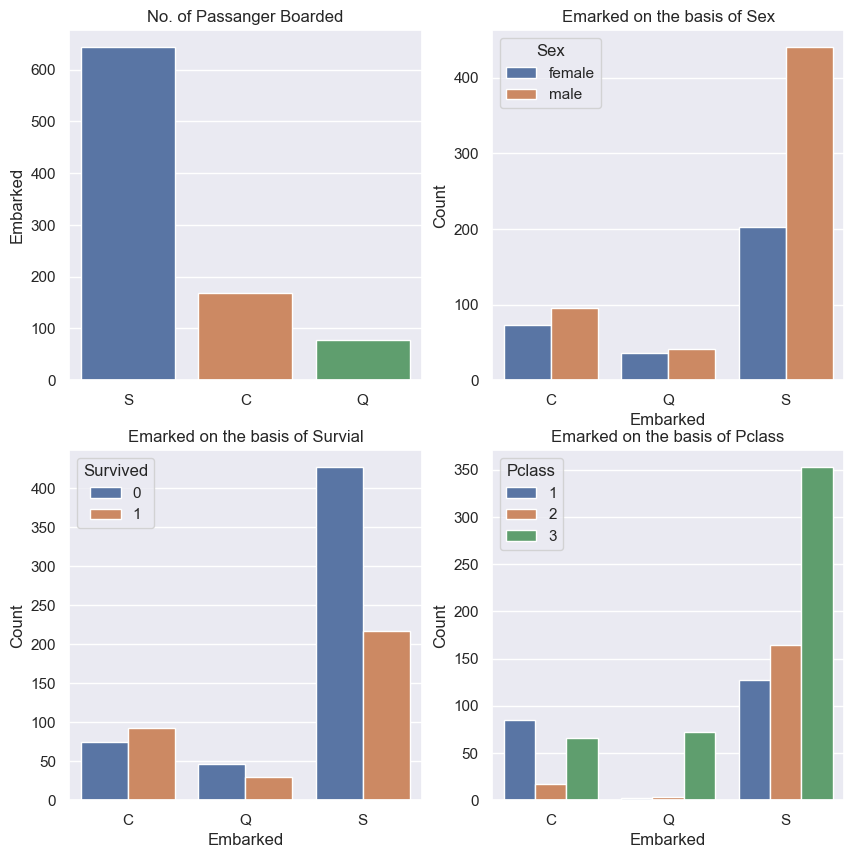

In [33]:
plt.figure(figsize=(10,10))



ax1 = plt.subplot(2,2,1)
sns.barplot(x=df.Embarked.value_counts().index , y = df.Embarked.value_counts())
plt.title('No. of Passanger Boarded')

ax2 = plt.subplot(2,2,2)
value_counts = df.groupby(['Embarked', 'Sex']).size().reset_index(name='Count')

sns.barplot(x=value_counts.Embarked , y='Count', hue='Sex', data=value_counts)
plt.title('Emarked on the basis of Sex')

ax3 = plt.subplot(2,2,3)
survial = df.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')

sns.barplot(x='Embarked' , y='Count', hue='Survived', data=survial)
plt.title('Emarked on the basis of Survial')

ax4 = plt.subplot(2,2,4)
Pcls = df.groupby(['Embarked', 'Pclass']).size().reset_index(name='Count')

sns.barplot(x='Embarked' , y='Count', hue='Pclass', data=Pcls)
plt.title('Emarked on the basis of Pclass')


- Maximum passenegers boarded from South Hapmton.

- Majority of onboarded passengers are from Pclass3.

- South Hapmton port from where majority of the rich people boarded. Still the chances for survival is low here, probably because many passengers are from Pclass3 who didn't survive.

- Port Q had almost 95% of the passengers were from Pclass3.

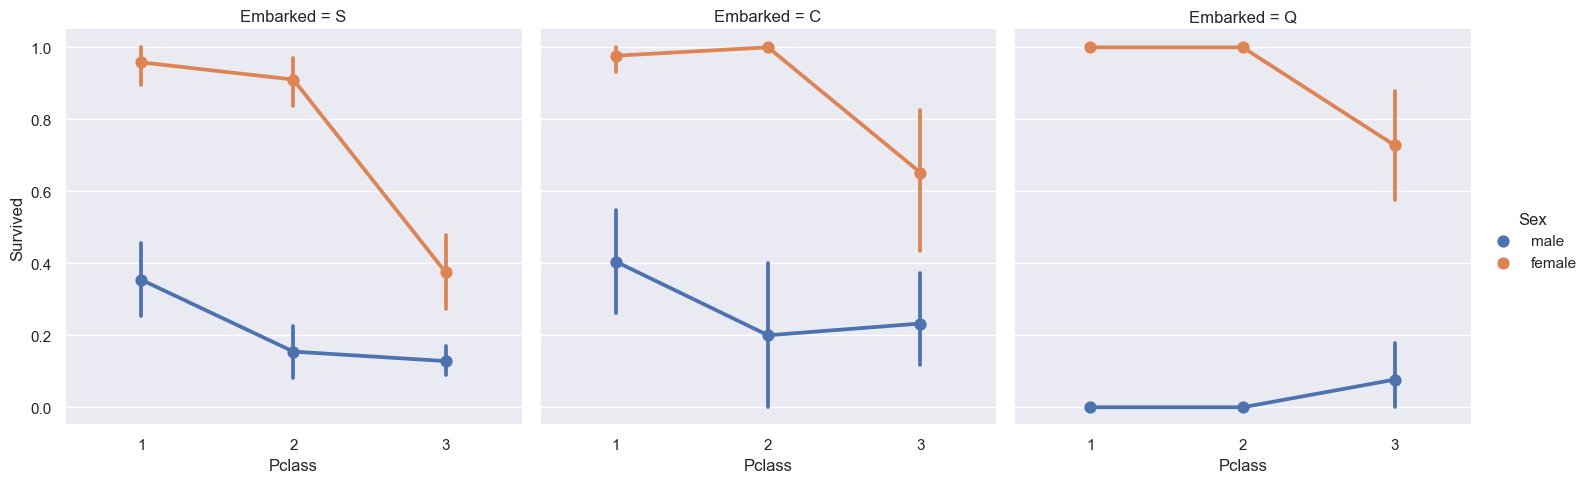

In [34]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point', col= 'Embarked')

plt.xlabel('Pclass')
plt.ylabel('Survived')

plt.show()

- As we can see on Queenstown Embarkment Male survial rate is low in comparison to other Embarked.

- Pclass 3 Females who onboarded from South Hampton seem to very unlucky, there suvival rate is 1 out to 3.

### Dealing with null values in Embarked column

As majority of passengers Embarked from South Hampton so lets with it with 'S'

In [35]:
# total number of null values in embarked
pd.isna(df['Embarked']).sum()

2

In [36]:
df.Embarked.fillna('S', inplace=True)

In [37]:
pd.isna(df['Embarked']).sum()

0

## Age

## Fare

<function matplotlib.pyplot.show(close=None, block=None)>

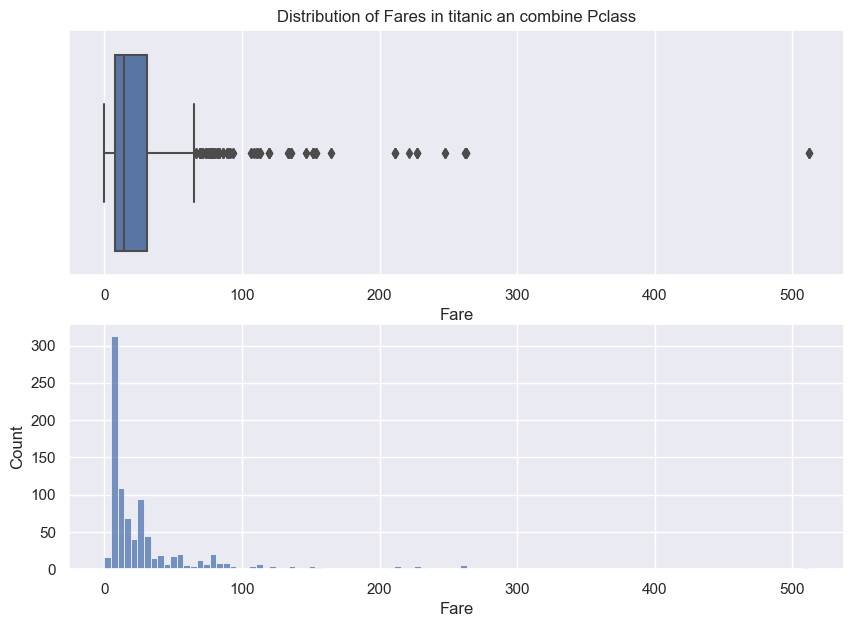

In [38]:
plt.figure(figsize=(10,7))

ax1 = plt.subplot(2,1,1)
sns.boxplot(x=df.Fare)
plt.title('Distribution of Fares in titanic an combine Pclass')

ax2 = plt.subplot(2,1,2)
sns.histplot(x=df.Fare)

plt.show

In [39]:
df['Pclass'][df['Pclass'] == 1]

1      1
3      1
6      1
11     1
23     1
      ..
871    1
872    1
879    1
887    1
889    1
Name: Pclass, Length: 216, dtype: int64

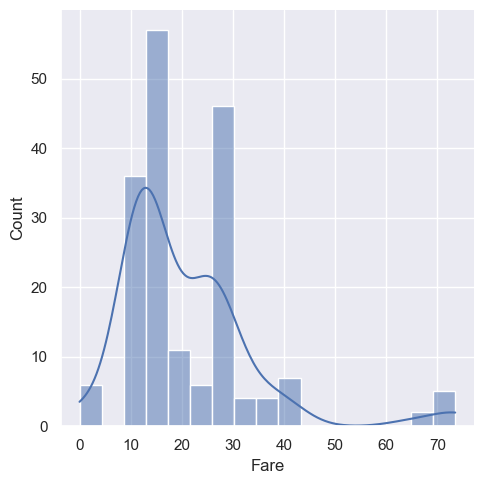

In [40]:
sns.displot(data=df, x=df['Fare'][df['Pclass'] == 2], kde=True)

<function matplotlib.pyplot.show(close=None, block=None)>

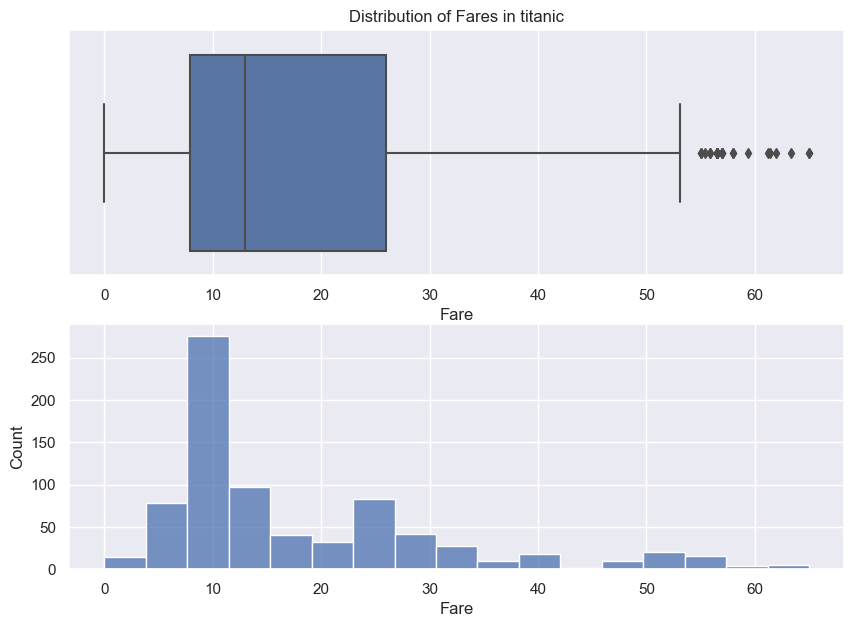

In [45]:
plt.figure(figsize=(10,7))

ax = plt.subplot(2,1,1)
sns.boxplot(x=filtered_df.Fare)
plt.title('Distribution of Fares in titanic')

ax = plt.subplot(2,1,2)
sns.histplot(x=filtered_df.Fare)

plt.show

In [46]:
df.Fare.min()

0.0